In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA # needed for fitting later...

In [3]:
np.random.seed(1234)

### replicate my process

In [4]:
# ARMA(1,0)

# ALWAYS put 1 as the first argument (zero-lag)!
# arparams = np.array([1, -0.4]) # the AR parameters should have the opposite sign 
# maparams = np.array([1, 0.0]) 

# choose "milder" parameters
arparams = np.array([1, -0.9]) #np.array([1, -0.1]) # the AR parameters should have the opposite sign 
maparams = np.array([1, 0.0]) 

arma_t_1_0 = ArmaProcess(arparams, maparams) 
print('is invertible:', arma_t_1_0.isinvertible)
print('is stationary:', arma_t_1_0.isstationary)

is invertible: True
is stationary: True


In [5]:
# ARMA(2,0)

# ALWAYS put 1 as the first argument (zero-lag)!
# arparams = np.array([1, -0.4, -0.4]) # the AR parameters should have the opposite sign 
# maparams = np.array([1, 0.0]) 

# choose "milder" parameters
arparams = np.array([1, -0.1, -0.1]) # the AR parameters should have the opposite sign 
maparams = np.array([1, 0.0]) 

arma_t_2_0 = ArmaProcess(arparams, maparams)
print('is invertible:', arma_t_2_0.isinvertible)
print('is stationary:', arma_t_2_0.isstationary)

is invertible: True
is stationary: True


In [6]:
# ARMA(3,0)

# ALWAYS put 1 as the first argument (zero-lag)!
# arparams = np.array([1, -0.4, -0.4, -0.2]) # the AR parameters should have the opposite sign 
# maparams = np.array([1, 0.0]) 

# choose "milder" parameters
arparams = np.array([1, -0.1, -0.1, -0.05]) # the AR parameters should have the opposite sign 
maparams = np.array([1, 0.0]) 

arma_t_3_0 = ArmaProcess(arparams, maparams)
print('is invertible:', arma_t_3_0.isinvertible)
print('is stationary:', arma_t_3_0.isstationary)

is invertible: True
is stationary: True


### Generate and plot. One process per model

Text(0.5, 1.0, 'arma(3,0), scale=0.01')

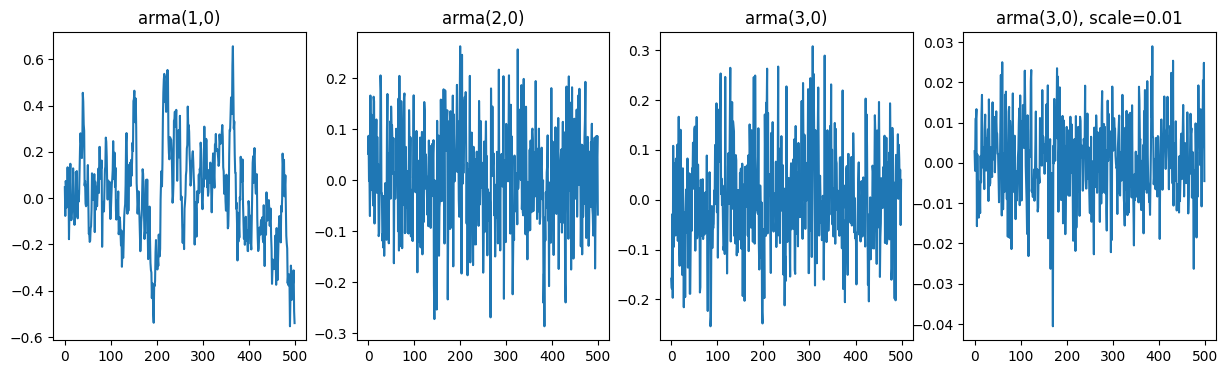

In [7]:
fig, ax = plt.subplots(1, 4, figsize = (15,4))

X_1 = arma_t_1_0.generate_sample(nsample=500, scale=0.1) # scale is std of epsilon_t (CHECK if I used var...!)
# X_1 = arma_t_1_0.generate_sample(nsample=500, scale=0.01) 
# X_1 = arma_t_1_0.generate_sample(nsample=500, scale=0.005)
ax[0].plot(X_1, label='X_1') 
ax[0].set_title('arma(1,0)')

X_2 = arma_t_2_0.generate_sample(nsample=500, scale=0.1)
# X_2 = arma_t_2_0.generate_sample(nsample=500, scale=0.01)
ax[1].plot(X_2, label='X_2')
ax[1].set_title('arma(2,0)')

X_3 = arma_t_3_0.generate_sample(nsample=500, scale=0.1)
# X_3 = arma_t_3_0.generate_sample(nsample=500, scale=0.01)
ax[2].plot(X_3, label='X_3')
ax[2].set_title('arma(3,0)')

X_3_std_001 = arma_t_3_0.generate_sample(nsample=500, scale=0.01)
ax[3].plot(X_3_std_001, label='X_3_std_001')
ax[3].set_title('arma(3,0), scale=0.01')

#### save to csv first

In [ ]:
# write np.array to csv file for future use, if directory does not exist, create it
def write_np_to_csv(y, col_name, filename):
    import os
    if not os.path.exists('data'):
        os.makedirs('data')
    df = pd.DataFrame(y, columns=[col_name])
    df.to_csv(filename, index=False)

In [ ]:
write_np_to_csv(X_1, 'arma(1,0)', 'data/arma_1_0.csv')

In [ ]:
write_np_to_csv(X_3, 'arma(3,0)', 'data/arma_3_0.csv')

In [ ]:
write_np_to_csv(X_3_std_001, 'arma(3,0)', 'data/arma_3_0_std_001.csv')

In [ ]:
stop

### Fit the correct arma(p,q) model to the already generated data

### Fit on the Train part i.e. **first 400** out of 500 samples

In [8]:
# arma_fit_1_0 = ARIMA(X_1, order=(1, 0, 0)).fit() # order: p, D, q
arma_fit_1_0 = ARIMA(X_1[:400], order=(1, 0, 0)).fit() # order: p, D, q

# arma_fit = ARIMA(X_1).fit() # default is not good :S

In [9]:
# arma_fit.resid
print(arma_fit_1_0.summary()) # --> check coeffs. It should be const~=0, ar.L1 ~= 0.4, sigma ~=0.01 == 0.1^2

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  400
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 365.900
Date:                Sat, 14 Oct 2023   AIC                           -725.801
Time:                        17:35:44   BIC                           -713.826
Sample:                             0   HQIC                          -721.059
                                - 400                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0591      0.036      1.634      0.102      -0.012       0.130
ar.L1          0.8655      0.026     33.859      0.000       0.815       0.916
sigma2         0.0094      0.001     14.868      0.0

In [10]:
# now fit ARMA(2,0)
# arma_fit_2_0 = ARIMA(X_2, order=(2, 0, 0)).fit()
arma_fit_2_0 = ARIMA(X_2[:400], order=(2, 0, 0)).fit()
print(arma_fit_2_0.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  400
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 357.406
Date:                Sat, 14 Oct 2023   AIC                           -706.813
Time:                        17:35:44   BIC                           -690.847
Sample:                             0   HQIC                          -700.490
                                - 400                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.006      0.472      0.637      -0.009       0.015
ar.L1          0.0504      0.046      1.104      0.270      -0.039       0.140
ar.L2          0.1122      0.055      2.048      0.0

In [11]:
# now fit ARMA(3,0)
# arma_fit_3_0 = ARIMA(X_3, order=(3, 0, 0)).fit()
arma_fit_3_0 = ARIMA(X_3[:400], order=(3, 0, 0)).fit()

print(arma_fit_3_0.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  400
Model:                 ARIMA(3, 0, 0)   Log Likelihood                 342.040
Date:                Sat, 14 Oct 2023   AIC                           -674.080
Time:                        17:35:44   BIC                           -654.123
Sample:                             0   HQIC                          -666.177
                                - 400                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0034      0.007      0.494      0.621      -0.010       0.017
ar.L1          0.0723      0.049      1.478      0.139      -0.024       0.168
ar.L2          0.0574      0.049      1.161      0.2

### Run predictions

Text(0.5, 1.0, 'arma(3,0)')

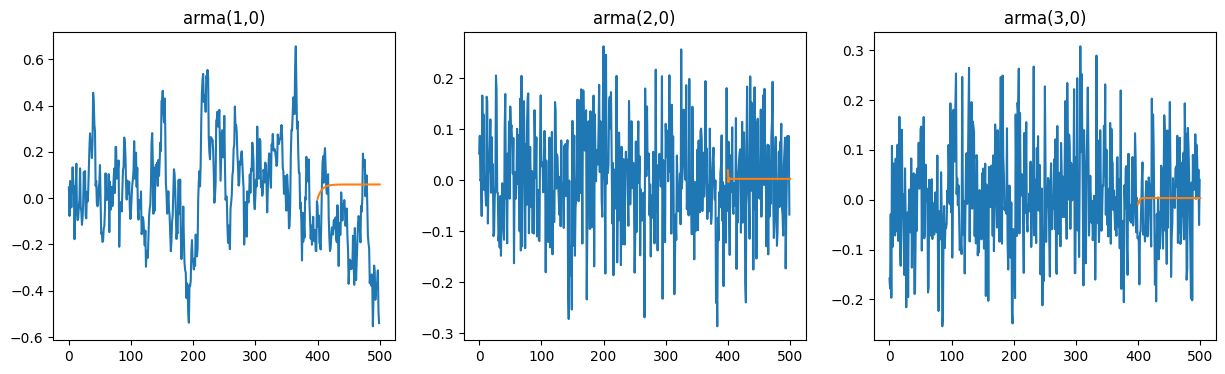

In [12]:
# plot fitted data, along with forecasting
fig, ax = plt.subplots(1, 3, figsize = (15,4))

X_1_preds = arma_fit_1_0.predict(start=400, end=500) # are considered out-of-sample
ax[0].plot(X_1, label='X_1') 
ax[0].plot(np.arange(400,501), X_1_preds, label='X_1_preds') 
ax[0].set_title('arma(1,0)')

X_2_preds = arma_fit_2_0.predict(start=400, end=500)
ax[1].plot(X_2, label='X_2') 
ax[1].plot(np.arange(400,501), X_2_preds, label='X_2_preds') 
ax[1].set_title('arma(2,0)')

X_3_preds = arma_fit_3_0.predict(start=400, end=500)
ax[2].plot(X_3, label='X_3') 
ax[2].plot(np.arange(400,501), X_3_preds, label='X_3_preds') 
ax[2].set_title('arma(3,0)')

# MSE calculation

In [13]:
arma_fit_3_0.params # coefficients: {const, phi_1, phi_2,... , theta_1, theta_2,... , var}

print(arma_fit_3_0.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  400
Model:                 ARIMA(3, 0, 0)   Log Likelihood                 342.040
Date:                Sat, 14 Oct 2023   AIC                           -674.080
Time:                        17:35:49   BIC                           -654.123
Sample:                             0   HQIC                          -666.177
                                - 400                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0034      0.007      0.494      0.621      -0.010       0.017
ar.L1          0.0723      0.049      1.478      0.139      -0.024       0.168
ar.L2          0.0574      0.049      1.161      0.2

### parameters original VS fitted

In [15]:
print('ARMA(1,0): original parameters: theta=', [0.4], ', std=', 0.1)
print('ARMA(1,0): fitted parameters:', arma_fit_1_0.params[1:])

ARMA(1,0): original parameters: theta= [0.4] , std= 0.1
ARMA(1,0): fitted parameters: [0.8655242  0.00936345]


In [16]:
print('ARMA(2,0): original parameters: theta=', [0.4, 0.4], ', std=', 0.1)
print('ARMA(2,0): fitted parameters:', arma_fit_2_0.params[1:])

ARMA(2,0): original parameters: theta= [0.4, 0.4] , std= 0.1
ARMA(2,0): fitted parameters: [0.05038381 0.112178   0.0098031 ]


In [17]:
print('ARMA(3,0): original parameters: theta=', [0.4, 0.4, 0.2], ', std=', 0.1)
print('ARMA(3,0): fitted parameters:', arma_fit_3_0.params[1:])

ARMA(3,0): original parameters: theta= [0.4, 0.4, 0.2] , std= 0.1
ARMA(3,0): fitted parameters: [0.07231455 0.05739058 0.09708826 0.01058552]


### MSE on validation set [400:500]

In [18]:
X_1_val = X_1[400:]
display(len(X_1_val))
X_1_preds
display(len(X_1_preds[:-1]))


100

100

In [19]:
# Mean Squared Error 
MSE = np.square(np.subtract(X_1_val, X_1_preds[:-1])).mean()  # check the last one
print('MSE without the last', MSE)

MSE = np.square(np.subtract(X_1_val, X_1_preds[1:])).mean()  # check
print('MSE without the first', MSE)

MSE without the last 0.07003161463252246
MSE without the first 0.07013528116121442


#### ARMA(2,0)

In [20]:
X_2_val = X_2[400:]

# Mean Squared Error 
MSE_2 = np.square(np.subtract(X_2_val, X_2_preds[:-1])).mean()  # check the last one
print('MSE without the last', MSE_2)

MSE_2 = np.square(np.subtract(X_2_val, X_2_preds[1:])).mean()  # check the last one
print('MSE without the first', MSE_2)

MSE without the last 0.008903947198658549
MSE without the first 0.008865282786553715


#### ARMA(3,0)

In [21]:
X_3_val = X_3[400:]

# Mean Squared Error 
MSE_3 = np.square(np.subtract(X_3_val, X_3_preds[:-1])).mean()  # check the last one
print('MSE without the last', MSE_3)

MSE_3 = np.square(np.subtract(X_3_val, X_3_preds[1:])).mean()  # check the last one
print('MSE without the first', MSE_3)

MSE without the last 0.008749203295453792
MSE without the first 0.008777559129892698


## Again for  ARMA(2,1) & ARMA(2,2)

In [22]:
# ALWAYS put 1 as the first argument (zero-lag)!
arparams = np.array([1, -0.4, -0.4]) # the AR parameters should have the opposite sign 
maparams = np.array([1, 0.25]) 

arma_t_2_1 = ArmaProcess(arparams, maparams) 
print('is invertible:', arma_t_2_1.isinvertible)
print('is stationary:', arma_t_2_1.isstationary)
print('=======================\n')

maparams = np.array([1, 0.25, 0.25])  # ([1, 1.0, 1.0]) 

arma_t_2_2 = ArmaProcess(arparams, maparams) 
print('is invertible:', arma_t_2_2.isinvertible)
print('is stationary:', arma_t_2_2.isstationary)

is invertible: True
is stationary: True

is invertible: True
is stationary: True


Text(0.5, 1.0, 'arma(2,2)')

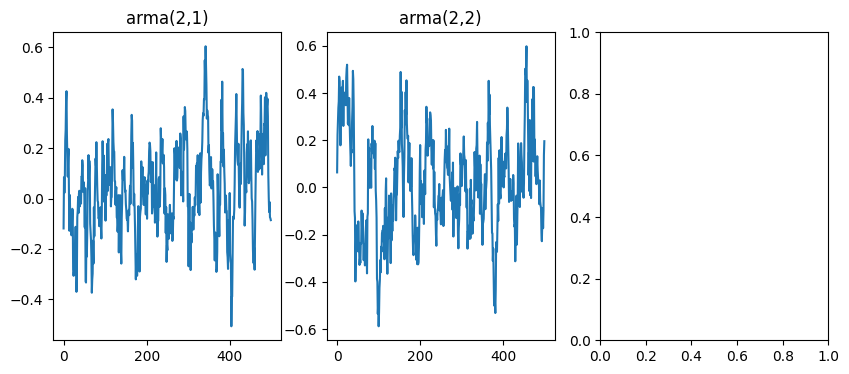

In [23]:
fig, ax = plt.subplots(1, 3, figsize = (10,4))

X_4 = arma_t_2_1.generate_sample(nsample=500, scale=0.1) # scale is std of epsilon_t (CHECK if I used var...!)
ax[0].plot(X_4, label='X_4') 
ax[0].set_title('arma(2,1)')

X_5 = arma_t_2_2.generate_sample(nsample=500, scale=0.1) # scale is std of epsilon_t (CHECK if I used var...!)
ax[1].plot(X_5, label='X_5') 
ax[1].set_title('arma(2,2)')


In [24]:
arma_fit_2_1 = ARIMA(X_4[:400], order=(2, 0, 1)).fit() # order: p, D, q
arma_fit_2_2 = ARIMA(X_5[:400], order=(2, 0, 2)).fit() 
print(arma_fit_2_1.summary())
print(arma_fit_2_2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  400
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 367.756
Date:                Sat, 14 Oct 2023   AIC                           -725.511
Time:                        17:35:56   BIC                           -705.554
Sample:                             0   HQIC                          -717.608
                                - 400                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0215      0.030      0.725      0.468      -0.037       0.079
ar.L1          0.4979      0.304      1.636      0.102      -0.099       1.095
ar.L2          0.3079      0.242      1.271      0.2

Text(0.5, 1.0, 'arma(2,2)')

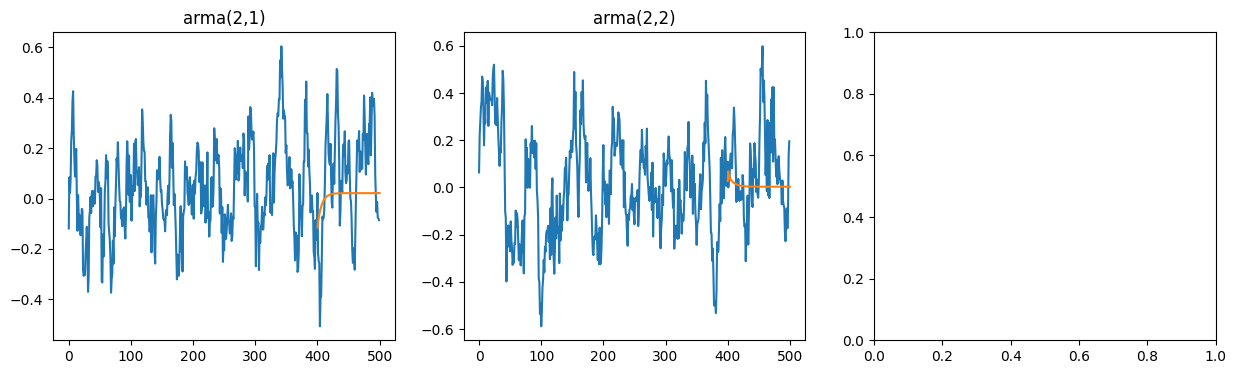

In [25]:
# plot fitted data, along with forecasting
fig, ax = plt.subplots(1, 3, figsize = (15,4))

X_4_preds = arma_fit_2_1.predict(start=400, end=500) # are considered out-of-sample
ax[0].plot(X_4, label='X_4') 
ax[0].plot(np.arange(400,501), X_4_preds, label='X_4_preds') 
ax[0].set_title('arma(2,1)')

X_5_preds = arma_fit_2_2.predict(start=400, end=500) # are considered out-of-sample
ax[1].plot(X_5, label='X_5') 
ax[1].plot(np.arange(400,501), X_5_preds, label='X_5_preds') 
ax[1].set_title('arma(2,2)')


In [26]:
X_4_val = X_4[400:]

# Mean Squared Error 
MSE_4 = np.square(np.subtract(X_4_val, X_4_preds[:-1])).mean()  # check the last one
print('MSE without the last', MSE_4)

MSE_4 = np.square(np.subtract(X_4_val, X_4_preds[1:])).mean()  # check the last one
print('MSE without the first', MSE_4)

MSE without the last 0.04610758380117881
MSE without the first 0.046379616600462276
